In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

In [3]:
g = np.load('graphs/graph_edges_5_0.npy')
g
#sum([0, 2, 9, 8, 29, 18])

ValueError: Object arrays cannot be loaded when allow_pickle=False

In [ ]:
class Edge:
    def __init__(self, _from, _to, _weight):
        '''
        У структуры ребра 3 поля: откуда, куда и вес ребра.
        Вес ребра \in {1, 2, 3},
        Ребро с весом 1 -- самое любимое
        '''
        self._from =  _from
        self._to  = _to
        self._weight = _weight
        
    def  __eq__(self, other):
        '''
        Определяет оператор '=' на ребрах
        '''
        return (self._from == other._from and
                         self._to == other._to) 
        
        
class PreferenceGraph:
    def __init__(self, basic_edges_index, code):
        '''
        edges -- список смежности 
        (лист длины 9, для каждой из вершин хранится 
        список ребер, которые из нее исходят)
        '''
        self.edges = [[] for _ in range(9)]
        self.add_basic_edges(basic_edges_index)
        self.add_other_edges(code)
        
    def show_edges(self):
        '''
        Печатает все ребра
        '''
        for i in range(9):
            for e in self.edges[i]:
                print('(from: {}, to: {}, weight: {})'.format(
                  str(e._from), str(e._to), str(e._weight)))
                print('\n')        

    def draw_edges(self):
        '''
        Рисует картинку с графом
        '''
        plt.figure(figsize=(16, 8))
        G = nx.DiGraph()
        G.add_nodes_from(range(9))
        for i in range(9):
            for e in self.edges[i]:
                G.add_edge(e._from, e._to, weight=e._weight)
        pos = nx.spring_layout(G)
        edge_labels=dict([((u, v,), d['weight'])
                 for u, v, d in G.edges(data=True)])
        get_color = lambda n: 'r' if n % 3 == 0 else (
            'g' if n % 3 == 1 else 'b')
        nx.draw_networkx_nodes(G, pos, node_size = 500,
                              node_color=[get_color(i) for i in range(9)])
        nx.draw_networkx_labels(G, pos)
        nx.draw_networkx_edges(G, pos, arrows=True)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
        plt.show()
                
        
    def add_edge(self, _from, _to, _weight):
        '''
        Добавляет в список смежности ребро
        '''
        self.edges[_from].append(Edge(_from, _to, _weight))
        
        
    def add_basic_edges(self, index):
        '''
        index \in {0, 1, 2, 3, 4, 5}
        В зависимости от индекса строится граф G''
        (добавляются ребра веса 1)
        '''
        if index == 0:
            '''
            цикл длины 9
            '''
            for i in range(9):
                self.add_edge(i % 9, (i + 1) % 9, 1)
        elif index == 1:
            '''
            цикл длины 6, отросток длины 3
            '''
            for i in range(6):
                self.add_edge(i % 6, (i + 1) % 6, 1)
            self.add_edge(6, 7, 1)
            self.add_edge(7, 8, 1)
            self.add_edge(8, 0, 1)    
        elif index == 2:
            '''
            цикл длины 6, откростки длины 2 и 1 подряд
            '''
            for i in range(6):
                self.add_edge(i % 6, (i + 1) % 6, 1)
            self.add_edge(6, 1, 1)
            self.add_edge(7, 8, 1)
            self.add_edge(8, 0, 1)
        elif index == 3:
            '''
            цикл длины 6, отростки длины 2 и 1 через одну вершину
            '''
            for i in range(6):
                self.add_edge(i % 6, (i + 1) % 6, 1)
            self.add_edge(6, 4, 1)
            self.add_edge(7, 8, 1)
            self.add_edge(8, 0, 1)
        elif index == 4:
            '''
            цикл длины 6, три отростка длины 1 подряд
            '''
            for i in range(6):
                self.add_edge(i % 6, (i + 1) % 6, 1)
            self.add_edge(6, 1, 1)
            self.add_edge(7, 2, 1)
            self.add_edge(8, 0, 1)
        elif index == 5:
            '''
            цикл длины 6, три отростка длины 1 через одного
            '''
            for i in range(6):
                self.add_edge(i % 6, (i + 1) % 6, 1)
            self.add_edge(6, 4, 1)
            self.add_edge(7, 2, 1)
            self.add_edge(8, 0, 1)
            
    def add_other_edges(self, code):
        for i in range(9):
            neighbours = {(i + 1) % 9, (i + 4) % 9, (i + 7) % 9}
            neighbours.remove(self.edges[i][0]._to)
            neighbours = list(neighbours) # список из двух вершин, 
            # в которые могут идти ребра веса 2 и 3 из вершины i
            if code[i] == '0':
                continue
            if code[i] == '1':
                self.edges[i].append(Edge(i, neighbours[0], 2))
            if code[i] == '2':
                self.edges[i].append(Edge(i, neighbours[1], 2))
            if code[i] == '3':
                self.edges[i].append(Edge(i, neighbours[0], 2))
                self.edges[i].append(Edge(i, neighbours[1], 3))
            if code[i] == '4':
                self.edges[i].append(Edge(i, neighbours[0], 3))
                self.edges[i].append(Edge(i, neighbours[1], 2))
    
    def check_threes_comb(self, comb):
        '''
        На вход дается трисочетание из одной, двух или трех троек.
        Проверяем по ребрам, возможно ли оно для данного графа.
        Если возможно, то возвращаем список длины 9, 
            где на i-м месте стоит вес ребра, которое 
            в трисочетании исходит из i-й вершины
            (если ничего не исходит, то вес 4)
        Если невозможно, возвращаем []    
        '''
        weights = [4] * 9
        for three in comb:
            man = [it for it in three if it % 3 == 0][0]
            woman = [it for it in three if it % 3 == 1][0]
            dog = [it for it in three if it % 3 == 2][0]
            
            edges1 = list(filter(
                lambda e: e._from == man and e._to == woman, self.edges[man]))
            edges2 = list(filter(
                lambda e: e._from == woman and e._to == dog, self.edges[woman]))
            edges3 = list(filter(
                lambda e: e._from == dog and e._to == man, self.edges[dog]))
            if not (len(edges1) == 1 and len(edges2) == 1 
                    and len(edges3) == 1):
                return []
            else:
                weights[edges1[0]._from] = edges1[0]._weight
                weights[edges2[0]._from] = edges2[0]._weight
                weights[edges3[0]._from] = edges3[0]._weight
        return weights
    
    
    def find_blocking_for_comb(self, comb):
        '''
        Дается трисочетание.
        Проверяем, возможно ли оно в данном графе 
        через check_threes_comb.
        Если возможно, то получаем в ответ веса.
        Далее пробегаемся по всем возможным тройкам,
        проверяем, есть ли среди них блокирующая.
        (возвращает True если есть и False если нет)
        '''
        weights = self.check_threes_comb(comb)
        if weights == []:
            return None
        threes = np.array(np.meshgrid([0, 3, 6], [1, 4, 7], [2, 8, 5])).T.reshape(-1, 3)
        for three in threes:
            man = [it for it in three if it % 3 == 0][0]
            woman = [it for it in three if it % 3 == 1][0]
            dog = [it for it in three if it % 3 == 2][0]
            
            edges1 = list(filter(
                lambda e: e._from == man and e._to == woman, self.edges[man])) 
            edges2 = list(filter(
                lambda e: e._from == woman and e._to == dog, self.edges[woman]))
            edges3 = list(filter(
                lambda e: e._from == dog and e._to == man, self.edges[dog]))
            if not (len(edges1) == 1 and len(edges2) == 1 
                    and len(edges3) == 1):
                continue
            if weights[edges1[0]._from] > edges1[0]._weight \
            and weights[edges2[0]._from] > edges2[0]._weight \
            and weights[edges3[0]._from] > edges3[0]._weight:
                return True
        return False        
        

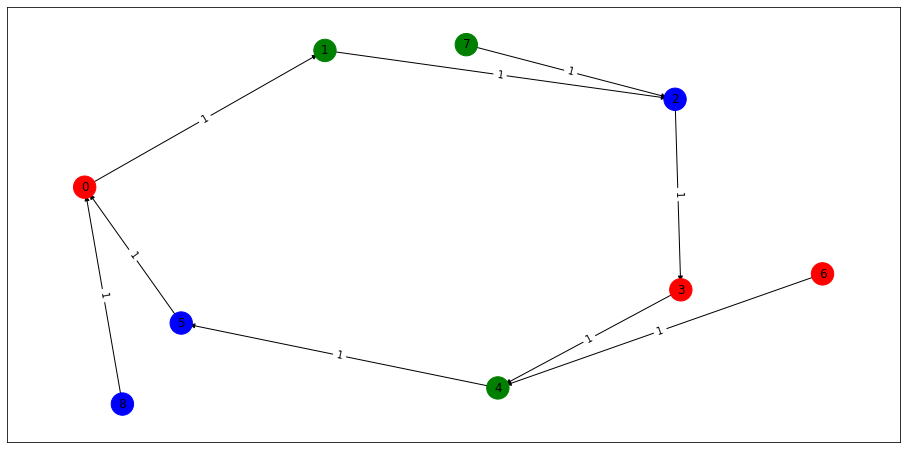

In [ ]:
g = PreferenceGraph(5, '000000000')
g.draw_edges()

In [ ]:
threes = np.array(np.meshgrid([0, 3, 6], [1, 4, 7], [2, 8, 5])).T.reshape(-1, 3)
check = lambda a: len(np.array(a).flatten()) == len(set(np.array(a).flatten()))
threes_combs = list(filter(check, combinations(threes, 3))) + list(
    filter(check, combinations(threes, 2))) + [tuple([t]) for t in threes]

In [ ]:
print(g.check_threes_comb(threes_combs[144]), threes_combs[144])
print(g.check_threes_comb(threes_combs[155]), threes_combs[155])

[] (array([0, 1, 2]),)
[] (array([0, 7, 8]),)


In [ ]:
g.find_blocking_for_comb(threes_combs[155])

In [ ]:
def make_string(x):
    '''
    из числа \in {0, ..., 5^9 - 1} делает 
    строку длины 9 с его пятиричной записью 
    '''
    return '0' * (9 - len(np.base_repr(x, 5))) + np.base_repr(x, 5)

In [ ]:
from tqdm import tqdm

In [ ]:
special = None
for code in tqdm(range(5 ** 9)):
    g = PreferenceGraph(0, make_string(code))
    comb_results = []
    for comb in threes_combs:
        comb_results.append(g.find_blocking_for_comb(comb))
        if comb_results[-1] == False:
          break
    if comb_results[-1] is not False and True in comb_results:
        break
if special is None:
    print('OK for index = 0'.format())                 

100%|██████████| 1953125/1953125 [35:51<00:00, 907.89it/s] 

OK for index = 0


In [ ]:
for index in tqdm(range(1, 6)):
    special = None
    for code in range(5 ** 9):
        g = PreferenceGraph(index, make_string(code))
        comb_results = []
        for comb in threes_combs:
            comb_results.append(g.find_blocking_for_comb(comb))
            if comb_results[-1] == False:
                break
        if (comb_results[-1] is not False) and (True in comb_results):
            break
    if special is None:
        print('OK for index = {}'.format(str(index)))
    else:
        break            

 20%|██        | 1/5 [10:22<41:30, 622.52s/it]

OK for index = 1


 40%|████      | 2/5 [21:41<31:58, 639.35s/it]

OK for index = 2


 60%|██████    | 3/5 [41:17<26:40, 800.46s/it]

OK for index = 3


 80%|████████  | 4/5 [1:01:09<15:17, 917.79s/it]

OK for index = 4


100%|██████████| 5/5 [1:06:23<00:00, 796.79s/it]

OK for index = 5


In [ ]:
special is None

True